## WeatherPy
Analysis

•	Temperatures are generally highest from -20 to 40 degrees in latitude and steadily decline as the distance away from this hotter range increases.    The findings from the plotted data jibes with our intuitive sense of where the hottest parts of the earth are.  The described range in latitude of hottest parts of the world covers from southern Africa to the northern Mediterranean and from northern Australia to central Japan.  
•	The relationship between humidity and latitude is not as obvious as in the temperature vs latitude, but several trends are apparent.  The 0 to 20 and 60 to 80 degrees of latitude ranges are on average the most humid.   These observations are not surprising because they encompass tropical zones and far northern North America and Eurasia which tend to be very humid in the late summer.   Overall, the humidity is not as clearly correlated with latitude as temperature is and most latitudes plotted can have high humidity.  
•	Wind speed measured in miles per hour shows that moderate wind speeds appear at almost any latitude.  The highest wind speeds, however, appear at and beyond 60 degrees north.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime
today = datetime.date.today()
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (0, 20)
lng_range = (-105, -75)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# testing size
lats = np.random.uniform(low=0, high=20, size=25)
lngs = np.random.uniform(low=-105, high=-75, size=25)
lat_lngs = zip(lats, lngs)
#print(lat_lng)
# Identify nearest city latitude and longitude
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#print(len(cities))
#print(cities)

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

In [4]:
# Alternative API call structure / Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"


# Build query URL
query_url = url + "appid=" + api_key + "&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=288d202524f103270fcd4898469239ad&q=


In [5]:
# set up lists to hold reponse info
lat = []
lng = []
temp = []
humid = []
cloudy = []
windy = []
legit_cities = []
countries = []
date = []
i = -1
#print(cities)
response = requests.get(query_url + city).json()
#print(response)
# Loop through list of cities and request data on each
print("Beginning Data Retrieval\n----------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        windy.append(response['wind']['speed'])
        legit_cities.append(response['name'])
        countries.append(response['sys']['country'])
        date.append(response['dt'])
        i = i + 1
        print("Retrieving Results for Index " + str(i) + ': ' + city.title())
        print("Data available for: " + city.title())
        print("Adding to dataframe...")
        print("----------------------------")
        
        
    except:
        pass
        i = i + 1
        print("Retrieving Results for Index " + str(i) + ': ' + city.title())
        print("Data not available for: " + city.title())
        print("Skipping...")
        print("----------------------------")

#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")
#print(legit_cities)
#print(len(legit_cities))
#print(len(lat))
#print(len(temp))


Beginning Data Retrieval
----------------------------
Retrieving Results for Index 0: La Paz Centro
Data available for: La Paz Centro
Adding to dataframe...
----------------------------
Retrieving Results for Index 1: Los Algarrobos
Data available for: Los Algarrobos
Adding to dataframe...
----------------------------
Retrieving Results for Index 2: Barra Patuca
Data available for: Barra Patuca
Adding to dataframe...
----------------------------
Retrieving Results for Index 3: Magdalena Milpas Altas
Data available for: Magdalena Milpas Altas
Adding to dataframe...
----------------------------
Retrieving Results for Index 4: Santa Cruz
Data available for: Santa Cruz
Adding to dataframe...
----------------------------
Retrieving Results for Index 5: Pochutla
Data available for: Pochutla
Adding to dataframe...
----------------------------
Retrieving Results for Index 6: Tubuala
Data available for: Tubuala
Adding to dataframe...
----------------------------
Retrieving Results for Index 7: 

In [7]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": legit_cities,
    "Country":countries,
    "Lat": lat,
    "Lng": lng,
    "Temp": temp,
    "Humidity": humid,
    "Cloudiness": cloudy,
    "Wind Speed": windy,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
#weather_data.to_csv('output_data/cities_df.csv')
weather_data.head(15)


,City,Country,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Date
0,La Paz Centro,NI,12.34,-86.68,86.00,70,40,4.70,1539453600
1,LOS ALGARROBOS,EC,-3.25,-79.94,89.60,33,75,11.41,1539453600
2,Barra Patuca,HN,15.80,-84.28,84.23,94,8,6.76,1539457166
3,Magdalena Milpas Altas,GT,14.55,-90.68,75.20,64,40,6.93,1539453600
4,Santa Cruz,US,36.97,-122.03,69.08,46,1,9.17,1539455700
5,Pochutla,MX,15.74,-96.47,84.96,66,90,11.41,1539452700
6,Tubuala,PA,9.52,-79.03,80.60,83,75,14.99,1539453600
7,San Cristobal,EC,-0.39,-78.55,62.60,48,75,4.70,1539453600
8,Iralaya,HN,15.00,-83.23,84.41,85,88,6.08,1539457175
9,Nicoya,CR,10.15,-85.45,80.60,74,75,3.36,1539453600


In [8]:
#create date stamp 
new_date = weather_data['Date'].mean()
graph_date = datetime.datetime.fromtimestamp(new_date)
datefinal = graph_date.strftime('%Y-%m-%d')

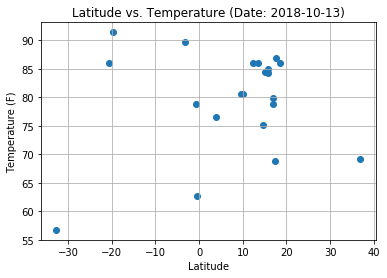

In [10]:
# * Temperature (F) vs. Latitude
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature" + ' (Date: ' + datefinal + ')')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/TemperaturevsLatitude.png", dpi = 900, linewidth=1)

# Show plot
plt.show()

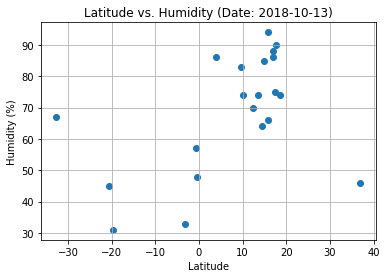

In [11]:
# Humidity (%) vs. Latitude
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity" +  ' (Date: ' + datefinal + ')')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/HumidityvsLatitude.png", dpi = 900, linewidth=1)

# Show plot
plt.show()


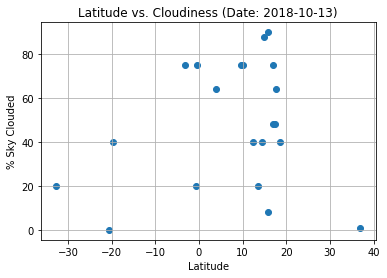

In [12]:
# Humidity (%) vs. Latitude
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness" + ' (Date: ' + datefinal + ')')
plt.ylabel("% Sky Clouded")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/CloudinessvsLatitude.png", dpi = 900, linewidth=1)

# Show plot
plt.show()


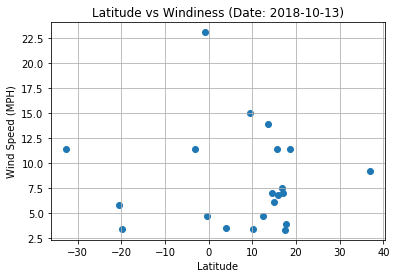

In [13]:
# Humidity (%) vs. Latitude
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Windiness"  + ' (Date: ' + datefinal + ')')
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/WindinessvsLatitude.png", dpi = 900, linewidth=1)

# Show plot
plt.show()
